In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib as lb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
house= pd.read_csv('/content/House_Price_dataset.csv')


In [ ]:
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,yes,no,yes,no,no,2.0,no,unfurnished
541,1767150,2400,3.0,1.0,1.0,no,no,no,no,no,0.0,no,semi-furnished
542,1750000,3620,2.0,1.0,1.0,yes,no,no,no,no,0.0,no,unfurnished
543,1750000,2910,3.0,1.0,1.0,no,no,no,no,no,0.0,no,furnished


In [ ]:
house.dtypes

,0
price,int64
area,int64
bedrooms,float64
bathrooms,float64
stories,float64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [ ]:
house.isna().sum()

,0
price,0
area,0
bedrooms,5
bathrooms,5
stories,2
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
house.select_dtypes(include='float64').median()

,0
bedrooms,3.0
bathrooms,1.0
stories,2.0
parking,0.0


In [ ]:
house.select_dtypes(include='float64').mode()

,bedrooms,bathrooms,stories,parking
0,3.0,1.0,2.0,0.0


In [ ]:
house.select_dtypes(include='float64').mean()

,0
bedrooms,2.961111
bathrooms,1.285185
stories,1.804788
parking,0.691312


In [ ]:
for column in house.columns:
  if house[column].isna().any():
    if house[column].dtype == 'float64':
      house[column] = house[column].fillna(house[column].median())
    else :
     house[column] = house[column].fillna(house[column].mode())



In [ ]:
house.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


[Text(0.5, 1.0, 'bedroom vs price')]

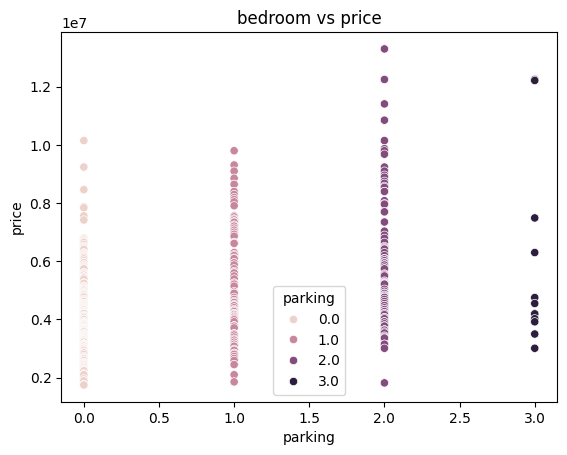

In [ ]:
sb.scatterplot(data=house,x='parking',y='price',hue='parking').set(title='bedroom vs price')

[Text(0.5, 1.0, 'mainroad vs price')]

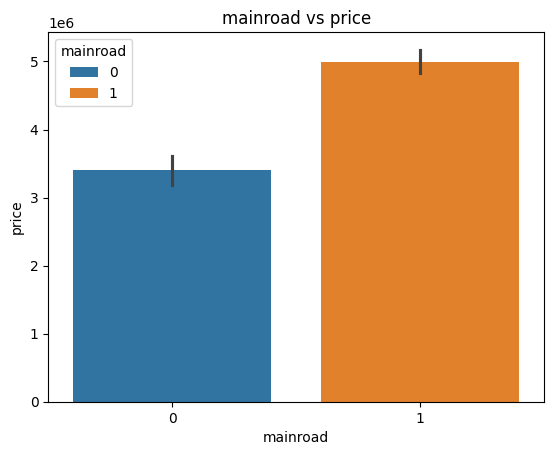

In [ ]:
sb.barplot(data=house,x='mainroad',y='price',hue='mainroad').set(title='mainroad vs price')

In [ ]:
h1=house.value_counts(house['bedrooms'])
h1

,count
bedrooms,
3.0,302
2.0,136
4.0,93
5.0,10
1.0,2
6.0,2


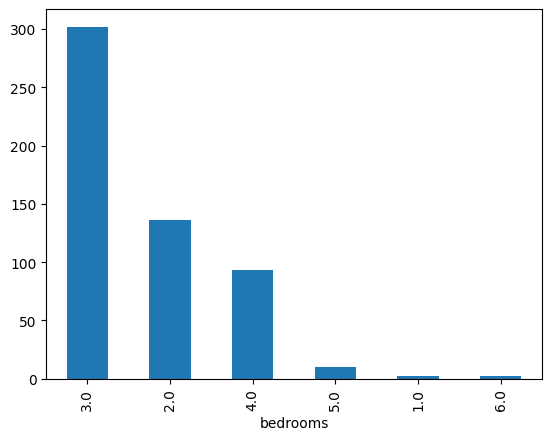

In [ ]:
h1=house.value_counts(house['bedrooms']).plot(kind='bar')

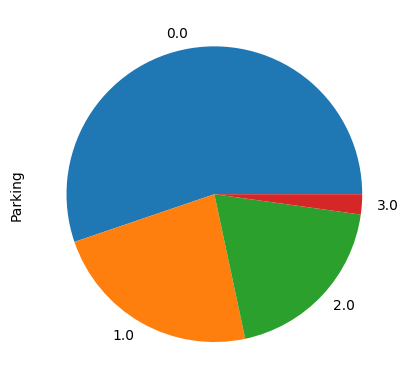

In [ ]:
h3=house.value_counts(house['parking']).plot(kind='pie',label='Parking')

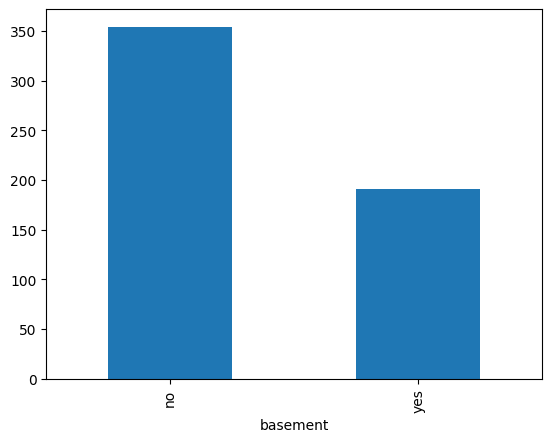

In [ ]:
h4=house.value_counts(house['basement']).plot(kind='bar')

[Text(0.5, 1.0, 'furnishingstatus vs price')]

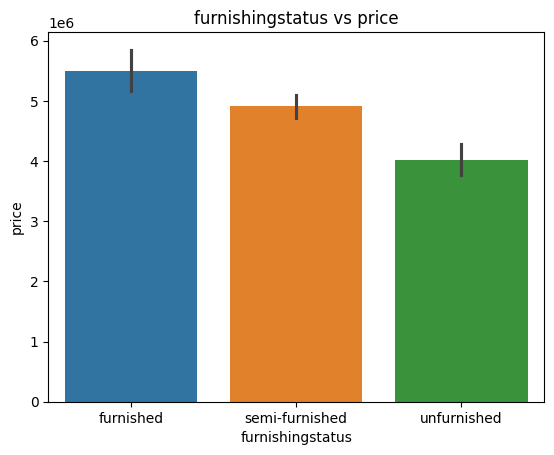

In [ ]:
sb.barplot(data=house,x='furnishingstatus',y='price',hue='furnishingstatus').set(title='furnishingstatus vs price')

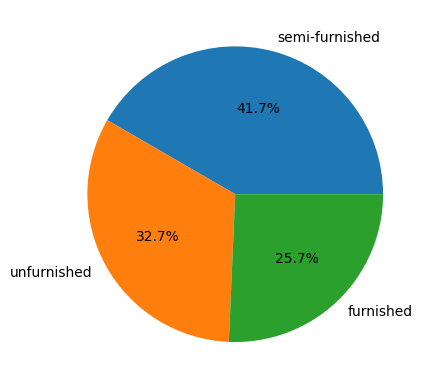

In [ ]:
furnishing_counts = house['furnishingstatus'].value_counts()
plt.pie(furnishing_counts.values, labels=furnishing_counts.index, autopct='%1.1f%%')
plt.show()

<Axes: xlabel='bathrooms'>

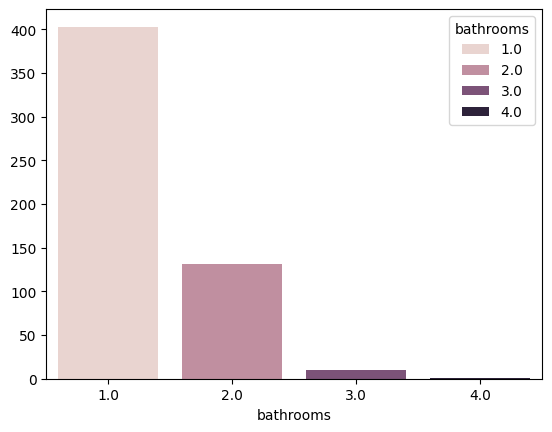

In [ ]:
bathroom_counts = house['bathrooms'].value_counts()
sb.barplot(x=bathroom_counts.index, y=bathroom_counts.values,hue=bathroom_counts.index)

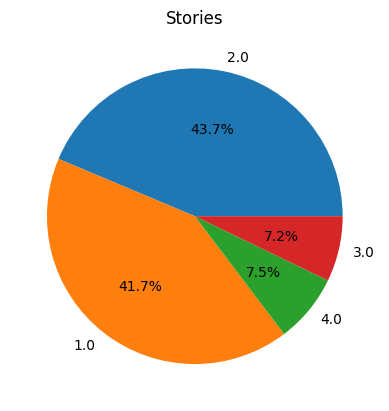

In [ ]:
stories_counts = house['stories'].value_counts()
plt.pie(stories_counts.values, labels=stories_counts.index, autopct='%1.1f%%' )
plt.title('Stories')
plt.show()

In [ ]:
sub_1=house[['area','price']]
sub_1

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000
...,...,...
540,3000,1820000
541,2400,1767150
542,3620,1750000
543,2910,1750000


In [ ]:
X = house[['area']]
Y = house[['price']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=49)

In [ ]:
X_train

,area
111,8372
229,9667
39,6000
492,2650
32,4880
...,...
453,3069
182,3410
501,2430
424,3100


In [ ]:
X_test

,area
24,8800
230,5400
496,4000
450,3450
378,2275
...,...
329,3960
419,4960
291,2953
523,2787


In [ ]:
model=LinearRegression().fit(X_train, Y_train)

In [ ]:
Y_pred=model.predict(X_test)
Y_pred

array([[6428048.56823071],
       [4900946.43693445],
       [4272139.67698893],
       [4025108.44986747],
       [3497359.91919891],
       [5359077.07632333],
       [4676372.59409676],
       [4721287.3626643 ],
       [5439923.65974489],
       [4451798.75125908],
       [4945861.20550198],
       [3553503.37990833],
       [4788659.5155156 ],
       [5197383.90948019],
       [5439923.65974489],
       [5332128.21518281],
       [5709412.27115012],
       [3903838.57473512],
       [3809517.56074329],
       [5118783.064487  ],
       [4556001.01433576],
       [3782568.69960277],
       [3822991.99131355],
       [5094079.94177486],
       [3839161.30799787],
       [4361969.214124  ],
       [4182310.13985385],
       [3351386.92135441],
       [5439923.65974489],
       [5116537.32605863],
       [4496713.51982661],
       [6248389.49396056],
       [4397901.02897803],
       [4038582.88043773],
       [5709412.27115012],
       [3818500.5144568 ],
       [5170435.04833967],
 

In [ ]:
MAE= mean_absolute_error (Y_test,Y_pred)
MAE

1038339.2791410489

In [ ]:
MSE=mean_squared_error (Y_test,Y_pred)
MSE

1837599014771.9895

In [ ]:
R2=r2_score (Y_test , Y_pred)
R2

0.360634268688364

In [ ]:
RMSE= np.sqrt(MSE)
MAE,MSE,R2,RMSE


(1038339.2791410489, 1837599014771.9895, 0.360634268688364, 1355580.6928294566)

<Axes: xlabel='area', ylabel='price'>

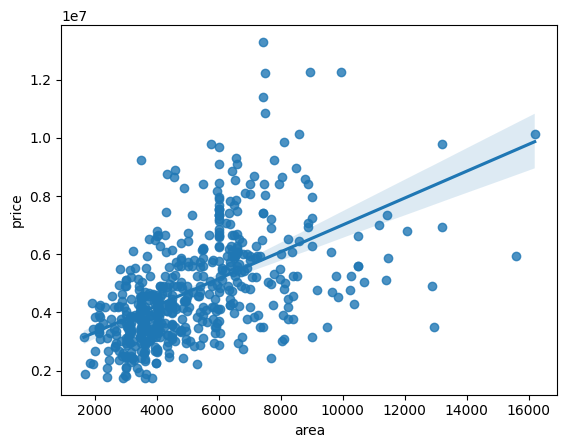

In [ ]:
sb.regplot(x='area',y='price',data=house)

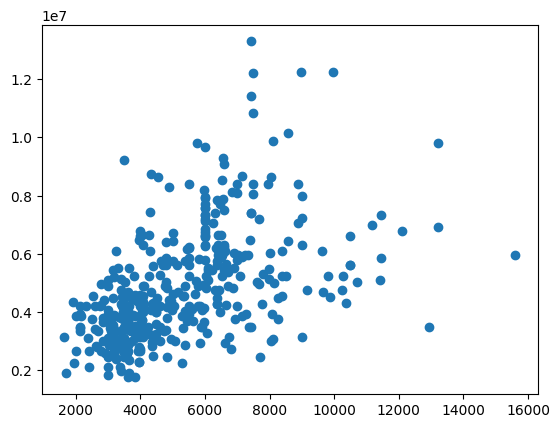

In [ ]:
plt.scatter(X_train,Y_train , label='scatter plot')


In [ ]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)
print("Y_pred shape:", Y_pred.shape)

X_train shape: (408, 1)
Y_train shape: (408, 1)
X_test shape: (137, 1)
Y_test shape: (137, 1)
Y_pred shape: (137, 1)


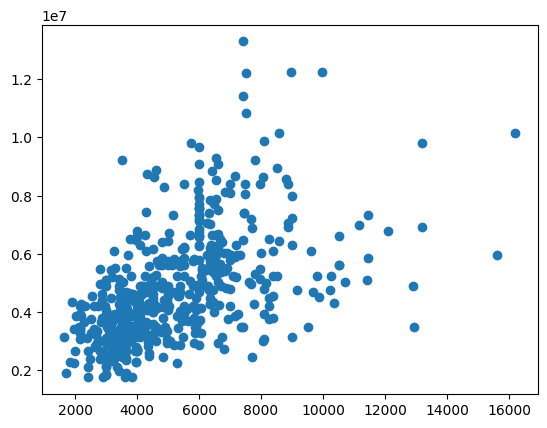

In [ ]:
plt.scatter(X, Y, label='Scatter plot')


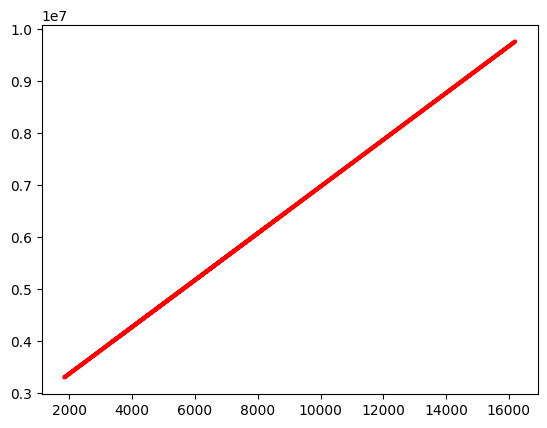

In [ ]:
plt.plot(X_test, Y_pred, color='red', linewidth=3)

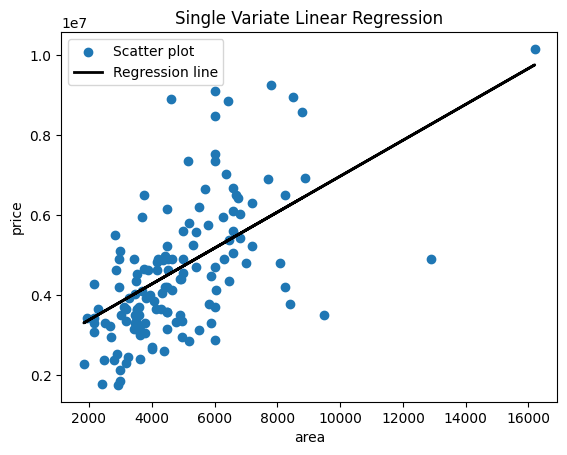

In [ ]:
plt.scatter(X_test , Y_test , label='Scatter plot' )
plt.plot(X_test , Y_pred , label='Regression line' , color = 'black' , linewidth = '2')
plt.xlabel('area')
plt.ylabel('price')
plt.title('Single Variate Linear Regression')
plt.legend()
plt.show()

In [ ]:
matrix=house.corr()
matrix

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366420,0.509123,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.382167,0.329777,-0.304721
area,0.535997,1.000000,0.155350,0.189698,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352356,0.234779,-0.171445
bedrooms,0.366420,0.155350,1.000000,0.363977,0.406050,-0.014103,0.083166,0.101336,0.047312,0.159206,0.135066,0.082078,-0.123235
bathrooms,0.509123,0.189698,0.363977,1.000000,0.325548,0.039557,0.130280,0.107814,0.068979,0.184595,0.180816,0.067735,-0.133700
stories,0.420712,0.083996,0.406050,0.325548,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.053636,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.014103,0.039557,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.201594,0.199876,-0.156726
guestroom,0.255517,0.140297,0.083166,0.130280,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.030381,0.160897,-0.118328
basement,0.187057,0.047417,0.101336,0.107814,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.048975,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.047312,0.068979,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.069949,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.159206,0.184595,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.156270,0.117382,-0.150477


In [ ]:
A= house[['area','bedrooms','bathrooms']]
B=house[['price']]
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.25,random_state=40)
M1 = LinearRegression().fit(A_train ,B_train)
B_pred=M1.predict(A_test)

In [ ]:
B_pred

array([[6219446.99793301],
       [6468859.56308942],
       [6881278.40424184],
       [3503667.87337309],
       [5039559.67245189],
       [4398698.71569319],
       [6617991.44720435],
       [3510871.74622558],
       [6192748.6440128 ],
       [3741332.96827448],
       [6384977.76488893],
       [3899873.58538036],
       [3585316.84212852],
       [3291730.5484268 ],
       [6051683.40153202],
       [2845195.75749923],
       [4426367.65357849],
       [6594682.26039016],
       [3934824.33463056],
       [3475707.27397292],
       [4074627.33163138],
       [3795021.33762975],
       [3252022.47877161],
       [4780632.46648552],
       [3615510.27097374],
       [3543375.94302827],
       [3568889.98998092],
       [6350027.01563872],
       [3767060.73822958],
       [3669198.64032901],
       [4160741.95927694],
       [5981781.90303161],
       [6816998.90229249],
       [3812496.71225485],
       [6577206.88576505],
       [3585316.84212852],
       [4391145.33534819],
 

In [ ]:
print("A_train shape:", A_train.shape)
print("B_train shape:", B_train.shape)
print("A_test shape:", A_test.shape)
print("B_test shape:", B_test.shape)
print("B_pred shape:", B_pred.shape)

A_train shape: (408, 3)
B_train shape: (408, 1)
A_test shape: (137, 3)
B_test shape: (137, 1)
B_pred shape: (137, 1)


In [ ]:
MAE = mean_absolute_error(B_test , B_pred)
MSE = mean_squared_error(B_test , B_pred)
R2=r2_score(B_test ,B_pred)
RMSE = np.sqrt(MSE)
print("MAE:", MAE)
print("MSE:", MSE)
print("R-squared:", R2)
print("RMSE:", RMSE)


MAE: 1128746.3378779078
MSE: 2621894177412.7754
R-squared: 0.42421854304223405
RMSE: 1619226.4132643018


In [ ]:
label_encoder = LabelEncoder()
house['basement'] = label_encoder.fit_transform(house['basement'])

In [ ]:
M1_x = pd.DataFrame(house, columns=['area','bedrooms', 'bathrooms', 'basement'])
M1_y = pd.DataFrame(house, columns=['price'])

M1_x_train, M1_x_test, M1_y_train, M1_y_test = train_test_split(M1_x, M1_y, test_size=0.25)

In [ ]:
multi_reg = LinearRegression()
multi_reg.fit(M1_x_train, M1_y_train)
M1_y_preds = multi_reg.predict(M1_x_test)

In [ ]:
MAE_1 = mean_absolute_error(M1_y_test, M1_y_preds)
R2_1= r2_score(M1_y_test, M1_y_preds)
MSE_1 = mean_squared_error(M1_y_test, M1_y_preds)
RMSE_1=np.sqrt(MSE_1)

print("MAE:", MAE_1,"MSE:", MSE_1,"R-squared:", R2_1,"RMSE_1:", RMSE_1)


#MAE:926798.6692680259,MSE:1587348760157.0203, R2:0.5409247693490657)(area)
#MAE: 1128746.3378779078 MSE: 2621894177412.7754 R2: 0.42421854304223405 (area,bedrooms,bathrooms)

MAE: 912025.5155356551 MSE: 1628481980540.9148 R-squared: 0.546978457676035 RMSE_1: 1276119.8926985327


In [ ]:
for column in house.columns:
    if house[column].dtype == 'object':
      house[column] = label_encoder.fit_transform(house[column])


In [ ]:
M2_x= pd.DataFrame(house, columns=['area','bedrooms', 'bathrooms', 'furnishingstatus','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea'])
M2_y = pd.DataFrame(house, columns=['price'])

M2_x_train, M2_x_test, M2_y_train, M2_y_test = train_test_split(M2_x, M2_y, test_size=0.25)

In [ ]:
M2 = LinearRegression()
M2.fit(M2_x_train, M2_y_train)
M2_y_preds = M2.predict(M2_x_test)

In [ ]:
MAE_2 = mean_absolute_error(M2_y_test, M2_y_preds)
R2_2= r2_score(M2_y_test, M2_y_preds)
MSE_2 = mean_squared_error(M2_y_test, M2_y_preds)
RMSE_2=np.sqrt(MSE_2)
print("MAE:", MAE_2,"MSE:", MSE_2,"R-squared:", R2_2,"RMSE_2:", RMSE_2)


#MAE:926798.6692680259,MSE:1587348760157.0203, R2:0.5409247693490657 RMSE:1259900.2977049495)(area)
#MAE: 1128746.3378779078 MSE: 2621894177412.7754 R2: 0.42421854304223405 RMSE: 1619226.4132643018 (area,bedrooms,bathrooms)
#MAE: 961772.3911438134 MSE: 1651845546039.6096 R-squared: 0.5279518601489644 RMSE_1: 1285241.4349217075(area,bedrooms,bathrooms,furnishingstatus)


MAE: 755813.3929015899 MSE: 1043114795519.5381 R-squared: 0.6866936555192109 RMSE_2: 1021329.9151202505


In [ ]:
oneHot = OneHotEncoder()
F1 = ['furnishingstatus']
transformer1 = ColumnTransformer([('oneHot', oneHot, F1)])


In [ ]:
M3_x = pd.DataFrame(house, columns=['furnishingstatus'])
M3_y = house['price']
M3_x_train, M3_x_test, M3_y_train, M3_y_test = train_test_split(M3_x, M3_y, test_size=0.25)


In [ ]:
M3 = LinearRegression()
M3.fit(M3_x_train, M3_y_train)
M3_y_preds = M3.predict(M3_x_test)


In [ ]:
MAE_3 = mean_absolute_error(M3_y_test, M3_y_preds)
R2_3= r2_score(M3_y_test, M3_y_preds)
MSE_3 = mean_squared_error(M3_y_test, M3_y_preds)
RMSE_3=np.sqrt(MSE_3)

print("MAE:", MAE_3,"MSE:", MSE_3,"R-squared:", R2_3,"RMSE_3:", RMSE_3)


MAE: 1439685.0117310372 MSE: 3381871901397.1787 R-squared: 0.05114986455426185 RMSE_3: 1838986.6506848761


In [ ]:
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,1,0,0,0,1,2.0,1,0
1,12250000,8960,4.0,4.0,4.0,1,0,0,0,1,3.0,0,0
2,12250000,9960,3.0,2.0,2.0,1,0,1,0,0,2.0,1,1
3,12215000,7500,4.0,2.0,2.0,1,0,1,0,1,3.0,1,0
4,11410000,7420,4.0,1.0,2.0,1,1,1,0,1,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,1,0,1,0,0,2.0,0,2
541,1767150,2400,3.0,1.0,1.0,0,0,0,0,0,0.0,0,1
542,1750000,3620,2.0,1.0,1.0,1,0,0,0,0,0.0,0,2
543,1750000,2910,3.0,1.0,1.0,0,0,0,0,0,0.0,0,0


In [ ]:
M4_x= pd.DataFrame(house, columns=['area','bedrooms', 'bathrooms', 'furnishingstatus','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea'])
M4_y = pd.DataFrame(house, columns=['price'])

M4_x_train, M4_x_test, M4_y_train, M4_y_test = train_test_split(M4_x, M4_y, test_size=0.25)

In [ ]:
M4 = LinearRegression()
M4.fit(M4_x_train, M4_y_train)
M4_y_preds = M4.predict(M4_x_test)


In [ ]:
MAE_4 = mean_absolute_error(M4_y_test, M4_y_preds)
R2_4= r2_score(M4_y_test, M4_y_preds)
MSE_4 = mean_squared_error(M4_y_test, M4_y_preds)
RMSE_4=np.sqrt(MSE_4)

print("MAE:", MAE_4,"MSE:", MSE_4,"R-squared:", R2_4,"RMSE_4:", RMSE_4)


MAE: 846848.0795982265 MSE: 1428748994509.8809 R-squared: 0.6257572752003311 RMSE_4: 1195302.88818771
